In [43]:
## Packages
# data wrangling
import numpy as np
import pandas as pd
from scipy import stats
from dfply import *
import statistics
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [2]:
print('pandas version', pd.__version__)
print('numpy version', np.__version__)

pandas version 1.0.4
numpy version 1.18.5


### Data Import

In [5]:
## read in data 
# inpt = pd.read_csv("../../../raw_data/Train_Inpatientdata-1542865627584.csv")
# outpt = pd.read_csv("../../../raw_data/Train_Outpatientdata-1542865627584.csv")
bene = pd.read_csv("../../../raw_data/Train_Beneficiarydata-1542865627584.csv")
flag = pd.read_csv("../../../raw_data/Train-1542865627584.csv")
df_ip = pd.read_csv('../processed_data/df_ip.csv', index_col = 0)
df_op = pd.read_csv('../processed_data/df_op.csv', index_col = 0)

In [8]:
df_ip.head(2)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE17521  CLM34721   2009-01-20  2009-02-01  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                   19000          PHY349293          PHY370861   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1      PHY363291  2009-01-20                 45340             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-02-01                987               4240               2639   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1               2948              40390              45821              28489   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1               5854               2753              E9305   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7769.0              5849.0   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_6         DOB  DOD  Gender  Race RenalDiseaseIndicator  \
0                 NaN  1943-01-01  NaN       1     1                     0   
1                 NaN  1913-12-01  NaN       2     1                     0   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0     39     230                   12                   12   
1     39     230                   12                   12   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0                      0                         1                          0   
1                      0                         0                          0   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                   1                           1                       0   
1                   1                           0                       1   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     0                          0                         1   
1                     1                          0                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                0                   0   
1                                1                   1   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                     19000                   1068                       100   

   OPAnnualDeductibleAmt PotentialFraud  ClaimDuration  HospitalDuration  \
0                     70            Yes              6                 6   
1                     20            Yes             12                12   

   TotalPaid  
0    27068.0  
1    20068.0

### imputatation

In [163]:
# # impute empty codes with 0
# print(inpt[inpt.columns[inpt.columns.str.contains(pat = 'Code')]].eq(0).any()) # check no code is currently 0

# # fill NA codes with 0
# # inpt.filter(like = 'Code', axis = 1)
# code_col_inpt = inpt.columns[inpt.columns.str.contains(pat = 'Code')]
# inpt[code_col_inpt] = inpt[code_col_inpt].fillna(0)
# code_col_outpt = outpt.columns[outpt.columns.str.contains(pat = 'Code')]
# outpt[code_col_outpt] = outpt[code_col_outpt].fillna(0)
# outpt.head(4)

In [9]:
# check no code is currently 0
print(df_ip[df_ip.columns[df_ip.columns.str.contains(pat = 'Cdoe')]].eq(0).any())

# # fill NA codes with 0
code_col_ip = df_ip.columns[df_ip.columns.str.contains(pat = 'Code')]
df_ip[code_col_ip] = df_ip[code_col_ip].fillna(0)

code_col_op = df_op.columns[df_op.columns.str.contains(pat = 'Code')]
df_op[code_col_op] = df_op[code_col_op].fillna(0)

Series([], dtype: bool)


### duplicated claim numbers

In [10]:
# duplicated claims
code_for_duplicate = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2', 
                      'ClmProcedureCode_1', 
                      'ClmAdmitDiagnosisCode']

# keep = first will mark all duplicates except the 1st occurrence
df_ip_duplicate = df_ip.duplicated(subset = code_for_duplicate, keep='first').sum()
print('inpatient claims', df_ip.shape[0], 'duplicate #', df_ip_duplicate, round(df_ip_duplicate/df_ip.shape[0], ndigits = 3))

df_op_duplicate = df_op.duplicated(subset = code_for_duplicate, keep='first').sum()
print('outpatient claims', df_op.shape[0], 'duplicate #', df_op_duplicate, round(df_op_duplicate/df_op.shape[0], ndigits = 3))

inpatient claims 40474 duplicate # 3759 0.093
outpatient claims 517737 duplicate # 280714 0.542


In [11]:
# duplicated claims
code_for_duplicate = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 
                      'ClmAdmitDiagnosisCode']


# keep = first will mark all duplicates except the 1st occurrence
df_ip_duplicate = df_ip.duplicated(subset = code_for_duplicate, keep=False).sum()
print('inpatient claims', df_ip.shape[0], 'duplicate #', df_ip_duplicate, round(df_ip_duplicate/df_ip.shape[0], ndigits = 3))

df_op_duplicate = df_op.duplicated(subset = code_for_duplicate, keep=False).sum()
print('outpatient claims', df_op.shape[0], 'duplicate #', df_op_duplicate, round(df_op_duplicate/df_op.shape[0], ndigits = 3))

inpatient claims 40474 duplicate # 1433 0.035
outpatient claims 517737 duplicate # 230185 0.445


inpatient claims 40474 duplicate # 1433 0.035
outpatient claims 517737 duplicate # 229202 0.443


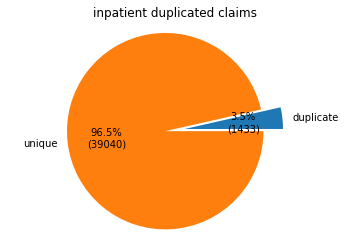

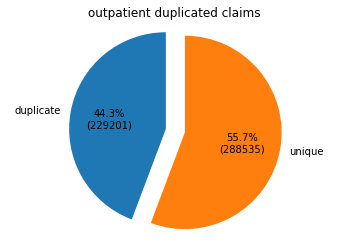

In [16]:
# duplicated claims
code_for_duplicate = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                      'ClmDiagnosisCode_5','ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                      'ClmAdmitDiagnosisCode']


# keep = first will mark all duplicates except the 1st occurrence
df_ip_duplicate = df_ip.duplicated(subset = code_for_duplicate, keep=False).sum()
print('inpatient claims', df_ip.shape[0], 'duplicate #', df_ip_duplicate, round(df_ip_duplicate/df_ip.shape[0], ndigits = 3))

df_op_duplicate = df_op.duplicated(subset = code_for_duplicate, keep=False).sum()
print('outpatient claims', df_op.shape[0], 'duplicate #', df_op_duplicate, round(df_op_duplicate/df_op.shape[0], ndigits = 3))

# keep = False, 'fist', 'last'
# use column index instead of column name?

# plot set up
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
labels = ['duplicate', 'unique']
explode = [0, 0.2]

# plots
pie_df_ip = [df_ip_duplicate, df_ip.shape[0]-df_ip_duplicate]
fig1, ax1 = plt.subplots()
ax1.pie(pie_df_ip, explode = explode, labels = labels, 
        autopct = lambda pct: func(pct, pie_df_ip), textprops = dict(color = 'black'))
ax1.axis('equal')
plt.title('inpatient duplicated claims')
# plt.show()
plt.savefig('../output/duplicate_inpatient.png')

pie_outpt = [df_op_duplicate, df_op.shape[0]-df_op_duplicate]
fig2, ax2 = plt.subplots()
ax2.pie(pie_outpt, explode = explode, labels = labels, startangle=90,
       autopct = lambda pct: func(pct, pie_outpt), textprops = dict(color = 'black'))
ax2.axis('equal')
plt.title('outpatient duplicated claims')
# plt.show()
plt.savefig('../output/duplicate_outpatient.png')
# autopct='%1.1f%%' for just percentage

## Q: if a code is NA is included as duplicates

In [17]:
# duplicate claim dataframe
dup_ip = df_ip[df_ip.duplicated(subset = code_for_duplicate, keep=False)].sort_values(by = 'ClmDiagnosisCode_1')
dup_ip.shape

(1433, 58)

In [18]:
dup_ip.duplicated(subset = code_for_duplicate, keep = False).all()

True

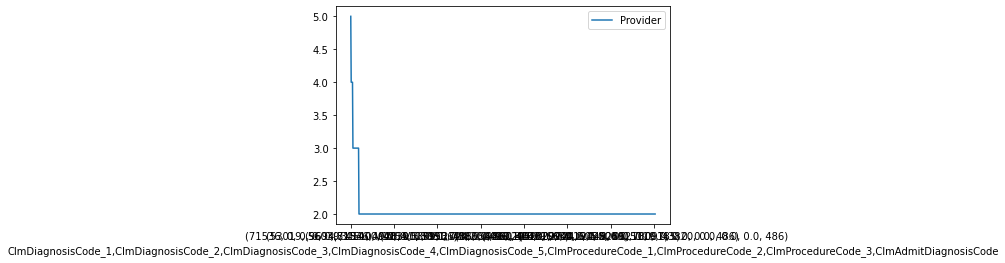

In [19]:
pd.DataFrame(dup_ip.groupby(code_for_duplicate).Provider.count()).sort_values(by = 'Provider', ascending = False).plot()

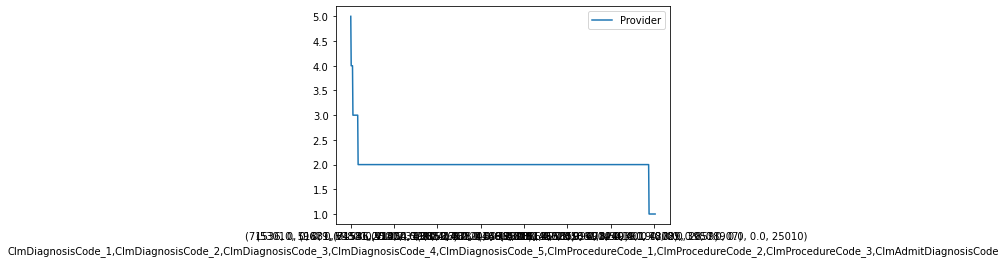

In [20]:
pd.DataFrame(dup_ip.groupby(code_for_duplicate).Provider.nunique()).sort_values(by = 'Provider', ascending = False).plot()

In [21]:
code_for_duplicate = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                      'ClmDiagnosisCode_5','ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                      'ClmAdmitDiagnosisCode']
code_dup_flag = code_for_duplicate + ['PotentialFraud']
# code_dup_flag

In [22]:
dup_ip.groupby(code_for_duplicate)['Provider','PotentialFraud'].head()

<ipython-input-22-315060ec6136>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dup_ip.groupby(code_for_duplicate)['Provider','PotentialFraud'].head()


Provider PotentialFraud
22904  PRV51940            Yes
10448  PRV55209            Yes
23923  PRV55916             No
13514  PRV56560            Yes
11871  PRV53855            Yes
26377  PRV51108             No
3349   PRV52019            Yes
2471   PRV51146            Yes
5671   PRV53242            Yes
37958  PRV53308             No
10657  PRV55171            Yes
1297   PRV51342             No
18169  PRV52027             No
26048  PRV53884            Yes
3253   PRV52019            Yes
28445  PRV56732            Yes
7869   PRV52985            Yes
14917  PRV53781            Yes
278    PRV54986            Yes
5680   PRV53266            Yes
27833  PRV55229             No
8478   PRV55911            Yes
26360  PRV55180             No
33284  PRV57120             No
20779  PRV52589            Yes
22180  PRV56730            Yes
20548  PRV54367            Yes
27108  PRV54337             No
17408  PRV51390            Yes
17097  PRV51119            Yes
5815   PRV54894            Yes
36798  PRV56563             No
34271  PRV51249            Yes
26236  PRV54705             No
8819   PRV55996            Yes
38973  PRV57487             No
32254  PRV51263            Yes
25540  PRV52459             No
32387  PRV52566             No
33577  PRV52308            Yes
32962  PRV56131             No
3331   PRV52019            Yes
223    PRV54986            Yes
34795  PRV55662             No
27354  PRV55158             No
2922   PRV55005             No
30878  PRV55737             No
12611  PRV55435            Yes
24563  PRV55156             No
30461  PRV55897            Yes
655    PRV51145            Yes
4268   PRV52280            Yes
2270   PRV51560            Yes
12805  PRV57177            Yes
5248   PRV56350            Yes
22793  PRV54391            Yes
12724  PRV55435            Yes
27134  PRV52862             No
18729  PRV54258            Yes
30659  PRV52130             No
20963  PRV52821            Yes
17836  PRV55755             No
4375   PRV51948            Yes
27192  PRV55690             No
24431  PRV52115            Yes
20761  PRV54367            Yes
11798  PRV57317            Yes
5121   PRV52120            Yes
34126  PRV57525            Yes
18636  PRV53787            Yes
25340  PRV51495            Yes
10896  PRV54772            Yes
11562  PRV52148             No
36835  PRV54205             No
25027  PRV52003             No
20433  PRV55835            Yes
35301  PRV55659            Yes
1755   PRV55462            Yes
24499  PRV53770             No
10462  PRV55209            Yes
27495  PRV54822            Yes
3960   PRV52178            Yes
7229   PRV51501            Yes
23810  PRV56260             No
19891  PRV52847            Yes
2591   PRV54936            Yes
38792  PRV57030            Yes
28222  PRV55030            Yes
3969   PRV52178            Yes
3967   PRV52178            Yes
14776  PRV54742            Yes
5286   PRV56350            Yes
2655   PRV57341            Yes
33961  PRV55443             No
26901  PRV57310            Yes
12920  PRV54781            Yes
14132  PRV54565             No
24256  PRV57530             No
16941  PRV57711             No
37699  PRV56105             No
6728   PRV51244            Yes
38187  PRV54845            Yes
23343  PRV54971             No
33907  PRV55836             No
12698  PRV55435            Yes
1705   PRV55462            Yes
11097  PRV55019            Yes
26398  PRV57425            Yes
2450   PRV51146            Yes
32761  PRV52136             No
25502  PRV57492             No
18857  PRV55452             No
21642  PRV51542            Yes
40188  PRV51300             No
19372  PRV52347            Yes
22443  PRV55971            Yes
19724  PRV52340            Yes
24260  PRV52574            Yes
14112  PRV53408             No
15487  PRV54333            Yes
19856  PRV51584            Yes
29836  PRV53677            Yes
13841  PRV55124             No
13247  PRV52642            Yes
359    PRV51148            Yes
2385   PRV51146            Yes
6972   PRV53385            Yes
34647  PRV53444             No
3716   P

In [23]:
dup_ip.sort_values(by = 'ClmDiagnosisCode_1', ascending = True, inplace=True)

In [26]:
# provider
# pd.DataFrame(dup_ip.groupby(code_for_duplicate).Provider.nunique().sort_values(ascending = False))
# claims
# pd.DataFrame(dup_ip.groupby(code_for_duplicate).ClaimID.nunique().sort_values(ascending = False))

In [85]:
dup_ip['group'] = dup_ip.groupby(code_for_duplicate).grouper.group_info[0] + 1

#### provider

dup_ip_provider = pd.DataFrame(dup_ip.groupby(code_dup_flag).Provider.nunique().sort_values(ascending = False))
dup_ip_provider

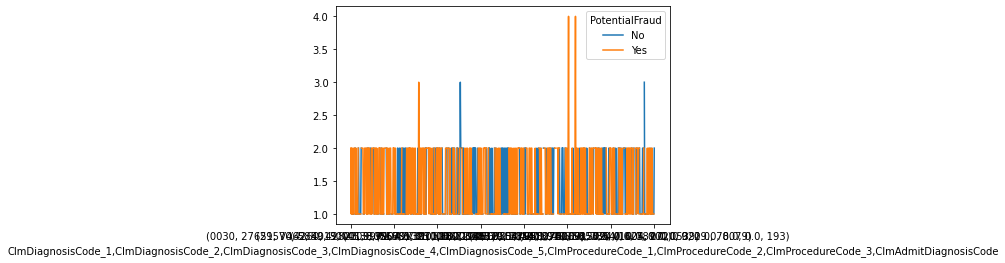

In [351]:
# sns.barplot(x = 'PotentialFraud', y = 'Provider', data = temp)
dup_ip_provider.unstack(level = 9).plot(y = 'Provider')

In [88]:
dup_ip.groupby(['group','PotentialFraud','Provider']).describe()

KeyboardInterrupt: 

### which provider is info receiver, which provider is info giver

In [316]:
temp = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmProcedureCode_1',
                             'ClmAdmitDiagnosisCode'] + ['PotentialFraud', 'Provider'] + ['ClaimStartDt']
temp = code_for_duplicate + ['PotentialFraud', 'Provider'] + ['ClaimStartDt']
new = dup_ip.groupby(code_for_duplicate)[temp]
new.head()

ClmDiagnosisCode_1 ClmDiagnosisCode_2  ClmProcedureCode_1  \
22904               0030              27651              9904.0   
10448               0030              27651              9904.0   
23923               0031              42833                 0.0   
13514               0031              42833                 0.0   
11871              00845              36250                 0.0   
26377              00845               V103                 0.0   
3349               00845              36250                 0.0   
2471               00845                486              3893.0   
5671               00845               V103                 0.0   
37958              00845                486              3893.0   
10657               0088              37205              4311.0   
1297                0088              37205              4311.0   
18169               0088              V4365                 0.0   
26048               0088              V4365                 0.0   
3253                0088              27651              4513.0   
28445               0088              27651              4513.0   
7869               03812               5990              9672.0   
14917              03812               5990              3491.0   
278                03812               5990              9672.0   
5680               03812               5990              3491.0   
27833              03842               2749                 0.0   
8478               03842              99591              9904.0   
26360              03842               2749                 0.0   
33284              03842               4264                 0.0   
20779              03842               4264                 0.0   
22180              03842              99591              9904.0   
20548              03849               5849              9904.0   
27108              03849               5849              9904.0   
17408               0389              28860                 0.0   
17097               0389               4019                 0.0   
5815                0389               5849                 0.0   
36798               0389              28860                 0.0   
34271               0389               2761              3893.0   
26236               0389               5849                 0.0   
8819                0389              99592                 0.0   
38973               0389              57400                 0.0   
32254               0389               4871                 0.0   
25540               0389              41400                 0.0   
32387               0389               5761              3893.0   
33577               0389              99592              9905.0   
32962               0389              37230              9390.0   
3331                0389              99592              8801.0   
223                 0389              99591                 0.0   
34795               0389               4871                 0.0   
27354               0389              42789              3995.0   
2922                0389               6826                 0.0   
30878               0389              41400                 0.0   
12611               0389              57400                 0.0   
24563               0389               2761              3893.0   
30461               0389               5761              3893.0   
655                 0389              37230              9390.0   
4268                0389              99592              8801.0   
2270                0389              42789              3995.0   
12805               0389              99592                 0.0   
5248                0389               4019                 0.0   
22793               0389              99591                 0.0   
12724               0389              99592              9905.0   
27134               0389               6826                 0.0   
18729               0417              E8780          

### differnece between fraud and nonfraud providers

In [339]:
display('Claims', pd.DataFrame(dup_ip.groupby('PotentialFraud').ClaimID.nunique()))
display('Providers', pd.DataFrame(dup_ip.groupby('PotentialFraud').Provider.nunique()))

'Claims'

ClaimID
PotentialFraud         
No                  602
Yes                 831

'Providers'

Provider
PotentialFraud          
No                   412
Yes                  283

In [ ]:
display('Claims', pd.DataFrame(dup_ip.groupby('PotentialFraud').ClaimID.nunique()))
display('Providers', pd.DataFrame(dup_ip.groupby('PotentialFraud').Provider.nunique()))

### reuse of patient ID?

In [373]:
dup_ip_bene = pd.DataFrame(dup_ip.groupby(code_dup_flag).BeneID.agg(['describe']))
dup_ip_bene

describe  \
                                                                                                                                                                                                count   
ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3 ClmAdmitDiagnosisCode PotentialFraud            
0030               27651              V462               4019               V103               9904.0             0.0                0.0                27651                 Yes                   2   
0031               42833              4730               515                5849               0.0                0.0                0.0                7907                  No                    1   
                                                                                                                                                                              Yes                   1   
00845              36250              25000              2768               5533               0.0                0.0                0.0                78791                 Yes                   2   
                   486                78659              27651              42822              3893.0             0.0                0.0                486                   No                    1   
                                                                                                                                                                              Yes                   1   
                   V103               45931              40391              78559              0.0                0.0                0.0                7802                  No                    1   
                                                                                                                                                                              Yes                   1   
0088               27651              2761               2768               42842              4513.0             0.0                0.0                78900                 Yes                   2   
                   37205              27651              99939              2859               4311.0             0.0                0.0                2768                  No                    1   
                                                                                                                                                                              Yes                   1   
                   V4365              07999              5368               2720               0.0                0.0                0.0                0088                  No                    1   
                                                                                                                                                                              Yes                   1   
03812              5990               1629               34839              5180               9672.0             0.0                0.0                486                   Yes                   2   
                                      2449               25000              51881              3491.0             0.0                0.0                0389                  Yes                   2   
03842              2749               5715               99591              2948               0.0                0.0                0.0                5070                  No                    2   
                   4264               99676              2761               25000              0.0                0.0                0.0                78079                 No                    1   
                                                                                                                                                                         

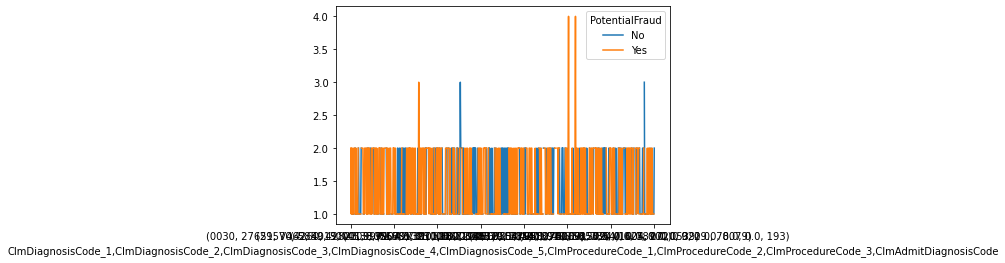

In [374]:
dup_ip_bene.unstack(level = 9).plot(y = ('describe', 'unique'))

### reuse of doctor ID?

In [367]:
dup_ip_physician = pd.DataFrame(dup_ip.groupby(code_dup_flag).AttendingPhysician.agg(['describe']))
dup_ip_physician

describe  \
                                                                                                                                                                                                count   
ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3 ClmAdmitDiagnosisCode PotentialFraud            
0030               27651              V462               4019               V103               9904.0             0.0                0.0                27651                 Yes                   2   
0031               42833              4730               515                5849               0.0                0.0                0.0                7907                  No                    1   
                                                                                                                                                                              Yes                   1   
00845              36250              25000              2768               5533               0.0                0.0                0.0                78791                 Yes                   2   
                   486                78659              27651              42822              3893.0             0.0                0.0                486                   No                    1   
                                                                                                                                                                              Yes                   1   
                   V103               45931              40391              78559              0.0                0.0                0.0                7802                  No                    1   
                                                                                                                                                                              Yes                   1   
0088               27651              2761               2768               42842              4513.0             0.0                0.0                78900                 Yes                   2   
                   37205              27651              99939              2859               4311.0             0.0                0.0                2768                  No                    1   
                                                                                                                                                                              Yes                   1   
                   V4365              07999              5368               2720               0.0                0.0                0.0                0088                  No                    1   
                                                                                                                                                                              Yes                   1   
03812              5990               1629               34839              5180               9672.0             0.0                0.0                486                   Yes                   2   
                                      2449               25000              51881              3491.0             0.0                0.0                0389                  Yes                   2   
03842              2749               5715               99591              2948               0.0                0.0                0.0                5070                  No                    2   
                   4264               99676              2761               25000              0.0                0.0                0.0                78079                 No                    1   
                                                                                                                                                                         

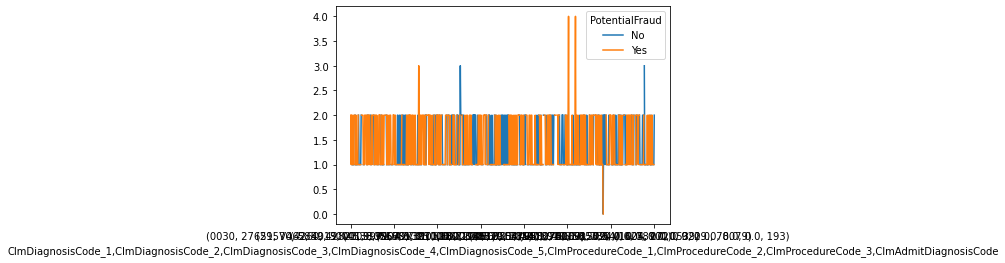

In [372]:
dup_ip_physician.unstack(level = 9).plot(y = ('describe', 'unique'))

### geographic location

In [375]:
dup_ip.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression

In [389]:
dup_ip_geo = pd.DataFrame(dup_ip.groupby(code_dup_flag).State.agg(['describe']))
dup_ip_geo

describe  \
                                                                                                                                                                                                count   
ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3 ClmAdmitDiagnosisCode PotentialFraud            
0030               27651              V462               4019               V103               9904.0             0.0                0.0                27651                 Yes                 2.0   
0031               42833              4730               515                5849               0.0                0.0                0.0                7907                  No                  1.0   
                                                                                                                                                                              Yes                 1.0   
00845              36250              25000              2768               5533               0.0                0.0                0.0                78791                 Yes                 2.0   
                   486                78659              27651              42822              3893.0             0.0                0.0                486                   No                  1.0   
                                                                                                                                                                              Yes                 1.0   
                   V103               45931              40391              78559              0.0                0.0                0.0                7802                  No                  1.0   
                                                                                                                                                                              Yes                 1.0   
0088               27651              2761               2768               42842              4513.0             0.0                0.0                78900                 Yes                 2.0   
                   37205              27651              99939              2859               4311.0             0.0                0.0                2768                  No                  1.0   
                                                                                                                                                                              Yes                 1.0   
                   V4365              07999              5368               2720               0.0                0.0                0.0                0088                  No                  1.0   
                                                                                                                                                                              Yes                 1.0   
03812              5990               1629               34839              5180               9672.0             0.0                0.0                486                   Yes                 2.0   
                                      2449               25000              51881              3491.0             0.0                0.0                0389                  Yes                 2.0   
03842              2749               5715               99591              2948               0.0                0.0                0.0                5070                  No                  2.0   
                   4264               99676              2761               25000              0.0                0.0                0.0                78079                 No                  1.0   
                                                                                                                                                                         

In [47]:
pd.DataFrame(dup_ip.groupby(code_dup_flag).State.apply(statistics.mode))

State
ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3 ClmAdmitDiagnosisCode PotentialFraud       
0030               27651              V462               4019               V103               9904.0             0.0                0.0                27651                 Yes                 7
0031               42833              4730               515                5849               0.0                0.0                0.0                7907                  No                 39
                                                                                                                                                                              Yes                45
00845              36250              25000              2768               5533               0.0                0.0                0.0                78791                 Yes                22
                   486                78659              27651              42822              3893.0             0.0                0.0                486                   No                 18
                                                                                                                                                                              Yes                 3
                   V103               45931              40391              78559              0.0                0.0                0.0                7802                  No                  1
                                                                                                                                                                              Yes                18
0088               27651              2761               2768               42842              4513.0             0.0                0.0                78900                 Yes                45
                   37205              27651              99939              2859               4311.0             0.0                0.0                2768                  No                  5
                                                                                                                                                                              Yes                49
                   V4365              07999              5368               2720               0.0                0.0                0.0                0088                  No                 10
                                                                                                                                                                              Yes                23
03812              5990               1629               34839              5180               9672.0             0.0                0.0                486                   Yes                16
                                      2449               25000              51881              3491.0             0.0                0.0                0389                  Yes                30
03842              2749               5715               99591              2948               0.0                0.0                0.0                5070                  No                 49
                   4264               99676              2761               25000              0.0                0.0                0.0                78079                 No                 46
                                                                                                                                                                              Yes                14
                   99591              42822              51884              4414               9904.0             0.0                0.0                27651                 Yes                45
03849              5849               2948               496              

In [48]:
pd.DataFrame(dup_ip.groupby(code_dup_flag).State.nunique())

State
ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3 ClmAdmitDiagnosisCode PotentialFraud       
0030               27651              V462               4019               V103               9904.0             0.0                0.0                27651                 Yes                 2
0031               42833              4730               515                5849               0.0                0.0                0.0                7907                  No                  1
                                                                                                                                                                              Yes                 1
00845              36250              25000              2768               5533               0.0                0.0                0.0                78791                 Yes                 2
                   486                78659              27651              42822              3893.0             0.0                0.0                486                   No                  1
                                                                                                                                                                              Yes                 1
                   V103               45931              40391              78559              0.0                0.0                0.0                7802                  No                  1
                                                                                                                                                                              Yes                 1
0088               27651              2761               2768               42842              4513.0             0.0                0.0                78900                 Yes                 2
                   37205              27651              99939              2859               4311.0             0.0                0.0                2768                  No                  1
                                                                                                                                                                              Yes                 1
                   V4365              07999              5368               2720               0.0                0.0                0.0                0088                  No                  1
                                                                                                                                                                              Yes                 1
03812              5990               1629               34839              5180               9672.0             0.0                0.0                486                   Yes                 2
                                      2449               25000              51881              3491.0             0.0                0.0                0389                  Yes                 2
03842              2749               5715               99591              2948               0.0                0.0                0.0                5070                  No                  2
                   4264               99676              2761               25000              0.0                0.0                0.0                78079                 No                  1
                                                                                                                                                                              Yes                 1
                   99591              42822              51884              4414               9904.0             0.0                0.0                27651                 Yes                 2
03849              5849               2948               496              

In [81]:
# ngroup_dup_ip = dup_ip.groupby(code_for_duplicate).ngroups
# dup_ip_state = dup_ip.groupby(code_for_duplicate)
dup_ip['group'] = dup_ip.groupby(code_for_duplicate).grouper.group_info[0] + 1

In [82]:
dup_ip_state_mode = pd.DataFrame(dup_ip.groupby(['group', 'PotentialFraud'])['State'].apply(statistics.mode))
dup_ip_state_mode

State
group PotentialFraud       
1     Yes                 7
2     No                 39
      Yes                45
3     Yes                22
4     No                 18
      Yes                 3
5     No                  1
      Yes                18
6     Yes                45
7     No                  5
      Yes                49
8     No                 10
      Yes                23
9     Yes                16
10    Yes                30
11    No                 49
12    No                 46
      Yes                14
13    Yes                45
14    No                 14
      Yes                26
15    No                 33
      Yes                 4
16    No                 45
      Yes                 5
17    No                 39
      Yes                 3
18    Yes                24
19    No                 37
20    No                 33
      Yes                 5
21    No                 36
      Yes                 4
22    No                 51
      Yes                36
23    No                 10
      Yes                39
24    No                 47
      Yes                33
25    No                 15
26    Yes                26
27    Yes                49
28    Yes                36
29    Yes                10
30    No                 10
      Yes                25
31    No                 37
      Yes                15
32    No                 37
      Yes                 7
33    Yes                14
34    Yes                50
35    Yes                52
36    Yes                36
37    No                 24
      Yes                 5
38    Yes                34
39    No                 10
      Yes                38
40    No                 22
41    Yes                31
42    No                 42
      Yes                 5
43    Yes                10
44    Yes                33
45    Yes                10
46    No                 52
      Yes                50
47    No                 39
      Yes                31
48    No                 45
      Yes                31
49    Yes                43
50    No                 33
      Yes                36
51    Yes                 4
52    Yes                36
53    Yes                51
54    No                 52
55    No                 51
      Yes                 5
56    No                  4
      Yes                11
57    Yes                11
58    No                 19
      Yes                26
59    Yes                21
60    No                 33
      Yes                14
61    Yes                29
62    No                 54
      Yes                19
63    No                 45
      Yes                23
64    No                 42
      Yes                30
65    Yes                42
66    Yes                22
67    No                  3
68    Yes                 6
69    No                  5
      Yes                50
70    No                 14
      Yes                 4
71    No                  8
72    Yes                45
73    No                  5
      Yes                11
74    No                  5
      Yes                 1
75    Yes                22
76    No                 23
      Yes                45
77    No                 39
      Yes                14
78    Yes                33
79    Yes                51
80    Yes                27
81    Yes                25
82    Yes                22
83    No                 32
84    No                 45
      Yes                15
85    Yes                 5
86    No                 26
      Yes                16
87    Yes                33
88    No                 11
      Yes                49
89    No                  3
      Yes                10
90    No                  5
      Yes                18
91    Yes                34
92    Yes                39
93    Yes                11
94    No                 26
      Yes                36
95    No                 38
      Yes                50
96    No                  3
      Yes         

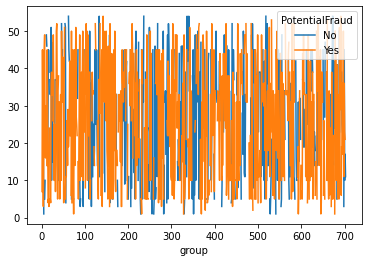

In [80]:
# sns.barplot(x = 'PotentialFraud', y = 'State', data = dup_ip_state_mode)
dup_ip_state_mode.unstack(level = 1).plot(y = 'State')

### duplicate claim sources

In [89]:
# duplicate claim dataframe
inpt_dup = inpt_flag[inpt_flag.duplicated(subset = code_for_duplicate, keep=False)]
outpt_dup = outpt_flag[outpt_flag.duplicated(subset = code_for_duplicate, keep=False)]
inpt_dup.to_csv( '../output/inpatient_duplicate.csv')
outpt_dup.to_csv('../output/outpatient_duplicate.csv')
# keep = False will mark all duplicates

In [90]:
display(inpt_dup.columns)
display(outpt_dup.columns)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'PotentialFraud'],
      dtype='object')

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'PotentialFraud'],
      dtype='object')

Provider
ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmProcedureCode_1 ClmAdmitDiagnosisCode          
0                  0                  0.0                0                          2284
4019               0                  0.0                0                          1258
4011               0                  0.0                0                          1148

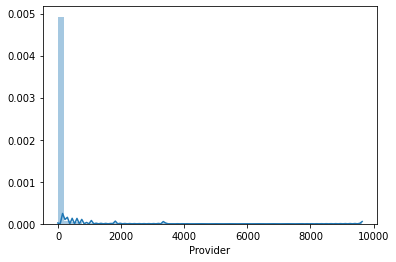

In [101]:
# providers
# display(inpt_dup[code_for_duplicate].nunique())
# display(pd.DataFrame(inpt_dup.groupby(code_for_duplicate).Provider.count()))

# display(inpt_dup[inpt_dup['ClmDiagnosisCode_1'] == '0389'])
# display(inpt_dup[inpt_dup['ClmDiagnosisCode_1'] == '0030'])
# display(inpt_dup[inpt_dup['ClmDiagnosisCode_1'] == '185'].sort_values(by = 'ClmDiagnosisCode_1'))
# display(inpt_dup[inpt_dup['ClmDiagnosisCode_1'] == '7224'].sort_values(by = 'ClmDiagnosisCode_1'))

code_for_duplicate_short = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                            'ClmProcedureCode_1','ClmAdmitDiagnosisCode']
# ## inpatient
# dup_provider_inpt = pd.DataFrame(inpt_dup.groupby(code_for_duplicate_short).\
#                             Provider.nunique().sort_values(ascending = False))
# display(dup_provider_inpt.head(3))
# # plot
# provider_count_inpt = pd.DataFrame(dup_provider_inpt.Provider.value_counts()).sort_index().\
#                         reset_index().rename(columns={'index':'number'}).sort_values(by = 'number')
# k = sns.barplot(x = 'number', y = 'Provider', data = provider_count_inpt)

# for index, row in provider_count_inpt.iterrows():
#     k.text(row.name,row.Provider, row.Provider, color='black', ha="center")
# plt.title('Inpatient Duplicated Claims Provider Numbers')
# plt.show()
# plt.savefig('../output/inpatient_duplicate_claim_provider_num.png')

## outpatient
# groupby automatically exclude NA
dup_provider_outpt = pd.DataFrame(outpt_dup.groupby(code_for_duplicate_short).\
                            Provider.nunique().sort_values(ascending = False))
display(dup_provider_outpt.head(3))
# plot
provider_count_outpt = pd.DataFrame(dup_provider_outpt.Provider.value_counts()).sort_index().\
                        reset_index().rename(columns={'index':'number'}).sort_values(by = 'number')
# g = sns.bar(x = 'number', y = 'Provider', data = provider_count_outpt)
g = sns.distplot(provider_count_outpt['Provider'])
# for index, row in provider_count_outpt.iterrows():
#     g.text(row.name,row.Provider, row.Provider, color='black', ha="center")
# plt.title('Outpatient Duplicated Claims Provider Numbers')
# plt.show()
# # introduce fraudulant flag
# plt.savefig('../output/outpatient_duplicate_claim_provider_num.png')

(array([209.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 9.6380e+02, 1.9266e+03, 2.8894e+03, 3.8522e+03,
        4.8150e+03, 5.7778e+03, 6.7406e+03, 7.7034e+03, 8.6662e+03,
        9.6290e+03]),
 <a list of 10 Patch objects>)

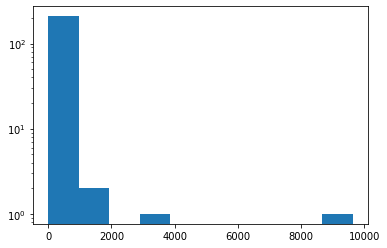

In [109]:
plt.hist(x = provider_count_outpt['Provider'], log = True)

In [108]:
provider_count_outpt.sort_values(by = 'Provider', ascending = False).iloc[]

number  Provider
1       2      9629
2       3      3362
3       4      1789
4       5      1075
5       6       765

### information provider & receivers

In [46]:
print(inpt.Provider.nunique())
print(flag.Provider.nunique())

2092
5410


### Merge with Fraud Flag

In [50]:
inpt_flag = inpt.merge(flag, on = 'Provider')
outpt_flag = outpt.merge(flag, on = 'Provider')

In [86]:
inpt_flag.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'PotentialFraud'],
      dtype='object')

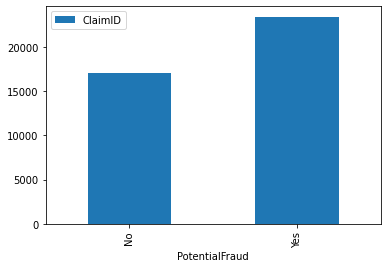

In [63]:
inpt_flag.groupby('PotentialFraud').count().plot(y = 'ClaimID', use_index = True, kind = 'bar')

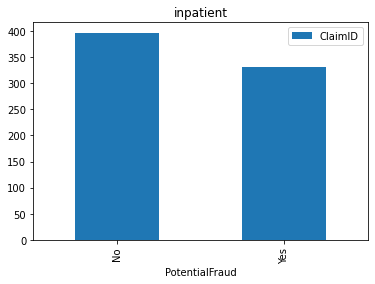

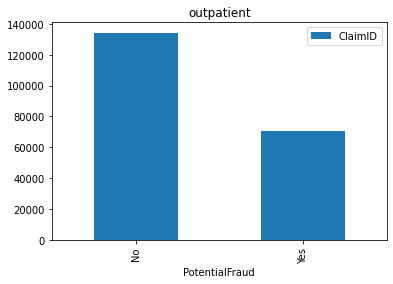

In [82]:
# duplicated claims
code_for_duplicate = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                      'ClmDiagnosisCode_5','ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_4',
                      'ClmAdmitDiagnosisCode']

# # keep = first will mark all duplicates except the 1st occurrence
# inpt_duplicate_flag = inpt_flag.duplicated(subset = code_for_duplicate, keep='first').sum()
# print('inpatient', inpt.shape[0], 'duplicate #', inpt_duplicate)

# outpt_duplicate_flag = outpt_flag.duplicated(subset = code_for_duplicate, keep='first').sum()
# print('outpatient', outpt.shape[0], 'duplicate #', outpt_duplicate)

inpt_flag[inpt_flag.duplicated(subset = code_for_duplicate, keep='first')].groupby('PotentialFraud').count().\
    plot(y = 'ClaimID', use_index = True, kind = 'bar', title = 'inpatient')
plt.savefig('../output/duplicateclaims_flag_inpatient.png')

outpt_flag[outpt_flag.duplicated(subset = code_for_duplicate, keep='first')].groupby('PotentialFraud').count().\
    plot(y = 'ClaimID', use_index = True, kind = 'bar', title = 'outpatient')
plt.savefig('../output/duplicateclaims_flag_outpatient.png')

inpatient duplicate 5919
outpatient duplicate 323119


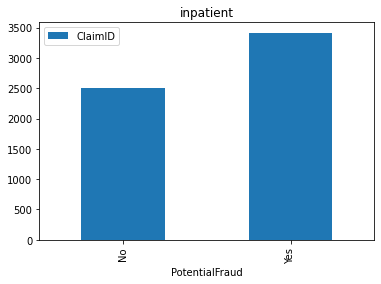

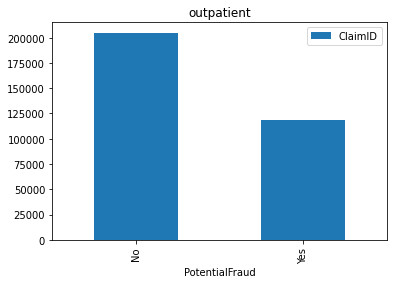

In [114]:
code_for_duplicate_short = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                            'ClmProcedureCode_1','ClmAdmitDiagnosisCode']

inpt_dup_flag_short = inpt_flag.duplicated(subset = code_for_duplicate_short, keep= False)
print('inpatient duplicate', inpt_dup_flag_short.sum())
inpt_flag[inpt_dup_flag_short].groupby('PotentialFraud').count().\
    plot(y = 'ClaimID', use_index = True, kind = 'bar', title = 'inpatient')

outpt_dup_flag_short = outpt_flag.duplicated(subset = code_for_duplicate_short, keep=False)
print('outpatient duplicate', outpt_dup_flag_short.sum())
outpt_flag[outpt_dup_flag_short].groupby('PotentialFraud').count().\
    plot(y = 'ClaimID', use_index = True, kind = 'bar', title = 'outpatient')

In [158]:
inpt.OtherPhysician.nunique()

2877

In [ ]:
# of physicians (per claim) groupby provider, 0, 1, 2, 3, 

### physicians

In [132]:
code_for_duplicate_short

['ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmProcedureCode_1',
 'ClmAdmitDiagnosisCode']

In [148]:
inpt_flag_dup_doctor = inpt_flag[inpt_dup_flag_short].groupby(['ClmDiagnosisCode_1','ClmDiagnosisCode_2',
        'ClmProcedureCode_1','ClmAdmitDiagnosisCode','PotentialFraud']).AttendingPhysician.nunique()
inpt_flag_dup_doctor

ClmDiagnosisCode_1  ClmDiagnosisCode_2  ClmProcedureCode_1  ClmAdmitDiagnosisCode  PotentialFraud
0030                27651               9904.0              27651                  Yes                2
0031                42833               0.0                 7907                   No                 1
                                                                                   Yes                1
00845               2449                0.0                 78900                  No                 1
                                                                                   Yes                1
                    27651               0.0                 78791                  Yes                4
                    36250               0.0                 78791                  Yes                2
                    4019                0.0                 78791                  No                 1
                                                                      

In [151]:
pd.DataFrame(inpt_flag_dup_doctor).sort_values(by = "AttendingPhysician", ascending = False)

AttendingPhysician
ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmProcedureCode_1 ClmAdmitDiagnosisCode PotentialFraud                    
V5789              4019               0.0                V5789                 Yes                             16
                   5990               0.0                V5789                 Yes                             16
486                4019               0.0                486                   Yes                             14
49121              4019               0.0                49121                 Yes                             13
486                4019               0.0                486                   No                              13
V5789              4019               0.0                V5789                 No                              13
78659              4019               0.0                78650                 No                              12
71536              4019               8154.0             71536                 Yes                             12
7802               4019               0.0                7802                  Yes                             11
486                25000              0.0                486                   Yes                             11
43310              4019               3812.0             43310                 Yes                             11
                                                                               No                              10
71536              4019               8154.0             71536                 No                              10
486                496                0.0                486                   No                              10
                   4280               0.0                486                   Yes                             10
5990               4019               0.0                5990                  No                              10
486                4280               0.0                486                   No                              10
                   27651              0.0                486                   Yes                             10
5990               25000              0.0                5990                  No                               9
42731              4019               0.0                42731                 Yes                              9
5770               4019               0.0                5770                  No                               9
486                2724               0.0                486                   Yes                              9
4280               25000              0.0                4280                  Yes                              8
486                41401              0.0                486                   No                               8
78659              4019               0.0                78650                 Yes                              8
486                25000              0.0                486                   No                               8
4280               4019               0.0                4280                  Yes                              8
V5789              25000              0.0                V5789                 Yes                              8
486                496                0.0                486                   Yes                              8
49121              4280               0.0                49121                 Yes                              8
486                42731              0.0                486                   Yes                              8
78659              2724               0.0                78650                 No                               7
                   496                0.0                78650                 Yes                              7
49121              41401              0.0                49121                 Yes                       

(array([1837., 1370.,   77.,   67.,   15.,   13.,   10.,    2.,    4.,
           2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

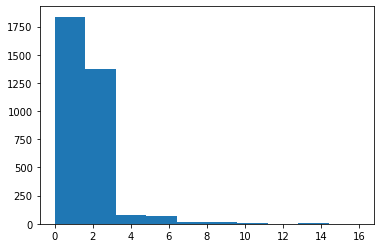

In [141]:
plt.hist(pd.DataFrame(inpt_flag_dup_doctor)['AttendingPhysician'])

In [ ]:
## Patrice 
in_merge[['ClaimStartDt','ClaimEndDt']].applymap(pd.to_datetime)
ClmDiagnCodes = ['ClmProcedureCode_{}'.format(x) for x in range(1,7)]
### Create new col
in_merge['NumProcCode'] =in_merge[ClmProcedureCodes].notnull().to_numpy().sum(axis = 1)
# date
in_merge['StayDuration'] = (in_merge['DischargeDt'] - in_merge['AdmissionDt']).dt.days